In [1]:
import numpy as np
import GPy
import matplotlib.pyplot as plt


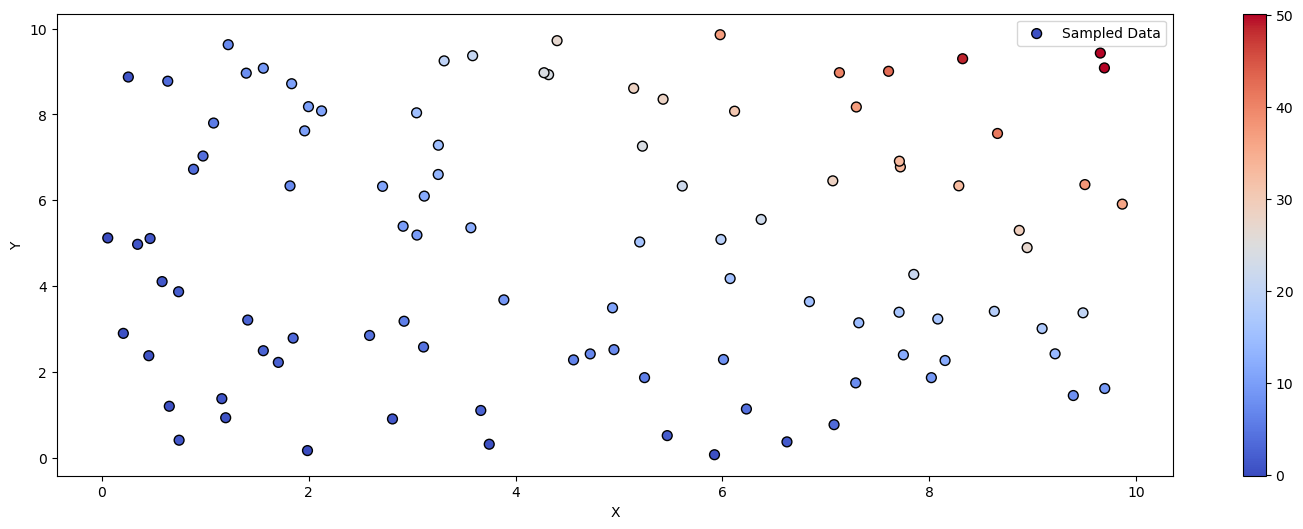

In [38]:
# Step 1: Generate synthetic spatial data using a new function
np.random.seed(42)  # Seed for reproducibility
n_points = 100  # Number of spatial points

# Randomly generate x and y values for 50 data points in the range [0, 10]
x = np.random.uniform(0, 10, n_points)
y = np.random.uniform(0, 10, n_points)

# Calculate the synthetic temperature values using a new function with some noise
# The new function is: temperature = exp(-(x^2 + y^2)) + 0.5 * x * y + noise
temperature = np.exp(-(x**2 + y**2)) + 0.5 * x * y + np.random.normal(0, 0.2, n_points)

fig, ax = plt.subplots(figsize=(18, 6))
ax.scatter(x, y, c=temperature, edgecolor='black', label='Sampled Data', s=50, cmap = 'coolwarm', vmin = 0, vmax = 40)  # Overlay sampled points
ax.set_xlabel('X')
ax.set_ylabel('Y')
fig.colorbar(gpr_img, ax=ax)
ax.legend()


In [35]:
# Combine x and y into a single matrix for Gaussian Process Regression (GPR)
# This matrix represents the coordinates where we have observed the temperature
coords = np.column_stack([x, y])

# Step 2: Define the grid for predictions
# Create a grid over the same range (0, 10) where we want to predict temperature
grid_x, grid_y = np.meshgrid(np.linspace(0, 10, 30), np.linspace(0, 10, 30))

# Flatten the grid into a list of points (each point has x, y coordinates)
grid_points = np.column_stack([grid_x.ravel(), grid_y.ravel()])

In [36]:
# Step 3: Gaussian Process Regression (GPR) using GPy
# Define a kernel for the GPR model
# We use a combination of Radial Basis Function (RBF) kernel and a bias kernel.
kernel = GPy.kern.RBF(input_dim=2, variance=1., lengthscale=1.) + GPy.kern.Bias(input_dim=2)

# Create a GP regression model using the observed coordinates (coords) and temperature data
gpr_model = GPy.models.GPRegression(coords, temperature[:, None], kernel)

# Optimize the model's hyperparameters to best fit the observed data
gpr_model.optimize('bfgs')

# Step 4: Make predictions using the trained GPR model
# Predict temperature values and uncertainties at the grid points
gpr_mean, gpr_variance = gpr_model.predict(grid_points)

# Reshape the predicted mean and variance values to match the grid's shape for visualization
gpr_mean_grid = gpr_mean.reshape(grid_x.shape)
gpr_variance_grid = gpr_variance.reshape(grid_x.shape)

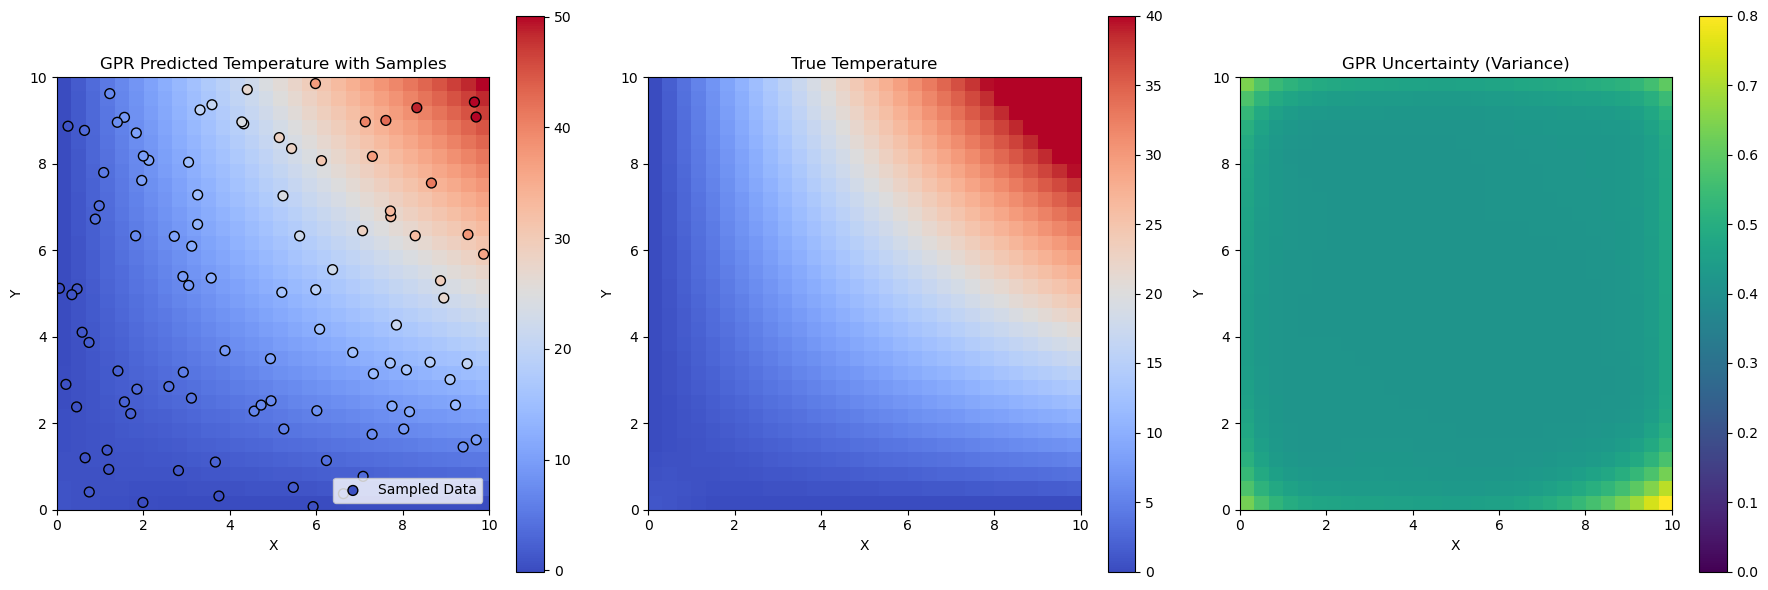

In [37]:
# Step 5: Calculate the "true" temperature values at the grid points
# Use the same function (without noise) to calculate the true values
true_temperature = np.exp(-(grid_x**2 + grid_y**2)) + 0.5 * grid_x * grid_y

# Step 6: Visualization of the results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot the GPR-predicted temperature values
gpr_img = ax[0].imshow(gpr_mean_grid, extent=(0, 10, 0, 10), origin='lower', cmap='coolwarm')
ax[0].scatter(x, y, c=temperature, edgecolor='black', label='Sampled Data', s=50, cmap = 'coolwarm', vmin = 0, vmax = 40)  # Overlay sampled points
ax[0].set_title('GPR Predicted Temperature with Samples')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
fig.colorbar(gpr_img, ax=ax[0])
ax[0].legend()

# Plot the true temperature values for comparison
true_img = ax[1].imshow(true_temperature, extent=(0, 10, 0, 10), origin='lower', cmap='coolwarm', vmin = 0, vmax = 40)
ax[1].set_title('True Temperature')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
fig.colorbar(true_img, ax=ax[1])

# Plot the GPR uncertainty (variance)
variance_img = ax[2].imshow(2 * np.sqrt(gpr_variance_grid), extent=(0, 10, 0, 10), origin='lower', cmap='viridis', vmin = 0, vmax = 0.8)
ax[2].set_title('GPR Uncertainty (Variance)')
ax[2].set_xlabel('X')
ax[2].set_ylabel('Y')
fig.colorbar(variance_img, ax=ax[2])

# Display the plots side by side
plt.tight_layout()
plt.show()